<a href="https://colab.research.google.com/github/karim-mammadov/Computer-Vision-My-projects/blob/main/German_Traffic_Sign_Recognition_Benchmarki_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"karimmammadov1","key":"bd3f40fd258b68cf544b437535a12d7d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 99% 603M/612M [00:01<00:00, 293MB/s]
100% 612M/612M [00:01<00:00, 392MB/s]


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
data_path = "/content/Train"

In [ ]:
import tensorflow as tf

imgs_size = (224, 224)

train_data = tf.keras.utils.image_dataset_from_directory(
    data_path,
    subset='training',
    seed=42,
    image_size=imgs_size,
    validation_split=0.2


)

valid_data = tf.keras.utils.image_dataset_from_directory(
    data_path,
    subset='validation',
    validation_split=0.2,
    seed=42,
    image_size=imgs_size

)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


In [ ]:
for image,label in train_data.take(1):
  print(label.numpy())


[ 8 12  4  4 27 32 19  3 29 13 38 10 18  5 25 19 18  1 35 23 12  5  5 12
 12 41 40  2  4 15  7 37]


In [ ]:
class_names = train_data.class_names
print(class_names)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


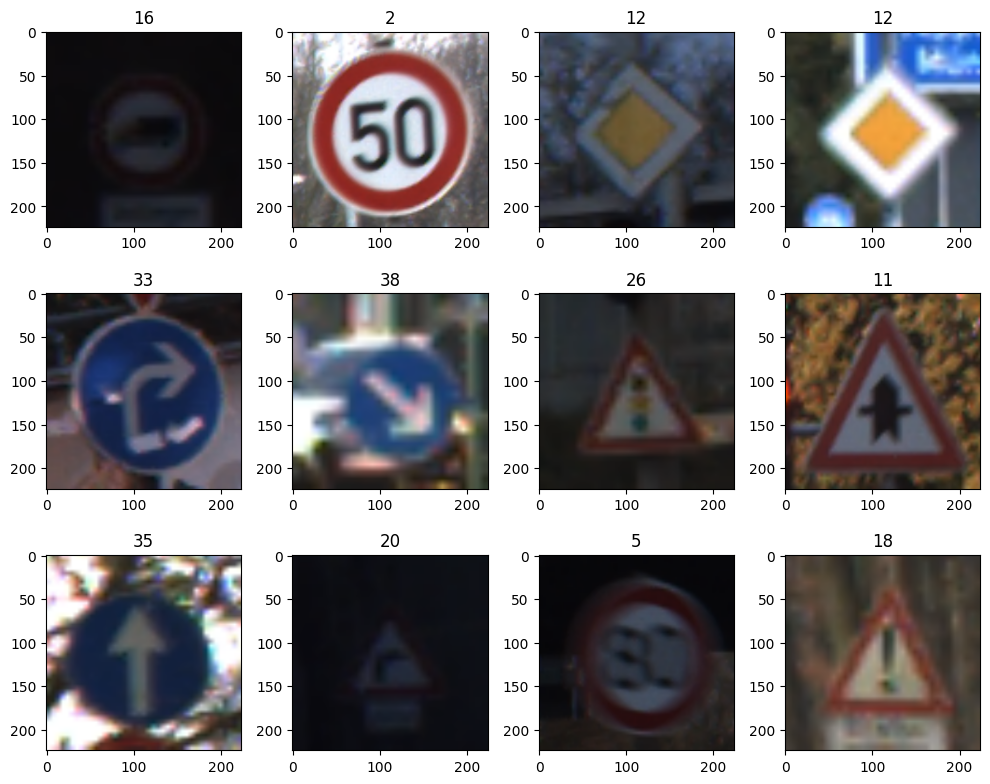

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for image, label in train_data.take(1):
  for i in range(12):
    plt.subplot(3,4, i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i].numpy().argmax()])
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

# model_1 = tf.keras.Sequential([l
#   tf.keras.layers.Conv2D(filters=10,
#                          kernel_size 3, activation='relu',
#                          input_shape=(224, 224, 3)),

#   tf.keras.layers.Conv2D(10, 3, activation='relu'),
#   tf.keras.layers.MaxPool2D(pool_size=2,
#                             padding='valid'),
#   tf.keras.layers.Conv2D(10, 3, activation='relu'),
#   tf.keras.layers.Conv2D(10, 3, activation='relu'),
#   tf.keras.layers.MaxPool2D(2),
#   tf.keras.layers.Flatten(),
#   tf.keras.layers.Dense(43, activation='softmax')
# ])


model = Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3,3),strides=1,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3),strides=1,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3),strides=1,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(256, (3,3),strides=1,activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(32, activation='relu', kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(43, activation='softmax')

])

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_data,
    epochs=5,
    validation_data=valid_data
)

Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 80s 72ms/step - accuracy: 0.4467 - loss: 3.2369 - val_accuracy: 0.8936 - val_loss: 0.9089
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 75s 67ms/step - accuracy: 0.9044 - loss: 0.8554 - val_accuracy: 0.9269 - val_loss: 0.7312
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.9418 - loss: 0.6684 - val_accuracy: 0.9554 - val_loss: 0.6129
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 65s 67ms/step - accuracy: 0.9552 - loss: 0.5876 - val_accuracy: 0.9681 - val_loss: 0.5311
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 68ms/step - accuracy: 0.9656 - loss: 0.5297 - val_accuracy: 0.9656 - val_loss: 0.4950


In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input_layer')
x = base_model(inputs)
print(f'Shape after base_model: {x.shape}')

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x)
print(f'Shape after GlobalAveragePooling2D(): {x.shape}')

outputs = tf.keras.layers.Dense(43, activation='softmax', name='output_layer')(x)
model_1 = tf.keras.Model(inputs, outputs)
model_1.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_10_percent = model_1.fit(train_data,
                                 epochs=5,
                                 steps_per_epoch=len(train_data),
                                 validation_data=valid_data,
                                 validation_steps=int(0.25 * len(valid_data)))

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shape after base_model: (None, 7, 7, 1280)
Shape after GlobalAveragePooling2D(): (None, 1280)
Epoch 1/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 78s 54ms/step - accuracy: 0.5770 - loss: 1.6072 - val_accuracy: 0.8673 - val_loss: 0.5130
Epoch 2/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 50s 35ms/step - accuracy: 0.8715 - loss: 0.5038 - val_accuracy: 0.9185 - val_loss: 0.3310
Epoch 3/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9154 - loss: 0.3417 - val_accuracy: 0.9411 - val_loss: 0.2438
Epoch 4/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9333 - loss: 0.2656 - val_accuracy: 0.9544 - val_loss: 0.2003
Epoch 5/5
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.9463 - loss: 0.2174 - val_accuracy: 0.9575 - val_loss: 0.1789
